In [1]:
from icecube import dataclasses, dataio, icetray
from icecube.icetray import I3Units
import matplotlib.pyplot as plt
import numpy as np
import argparse, matplotlib

def astroFlux(Energy):
    '''
    Values taken from: A measurement of the diffuse astrophysical 
    muon neutrino flux using eight years of IceCube data.
    
    Link: https://inspirehep.net/files/99e2e4c9620a0bb4ddd15ff7749090b4
    '''
    
    return (1.01*1e-18)*(Energy/(100*1000))**(-2.19)

def simpleWeight(oneWeight, flux):
    return oneWeight*flux

In [2]:
# open file
infileList = []
f = 0
for i in range(0, 2000):
    infile = dataio.I3File('/data/p-one/akatil/step_1_medium_water/tauDecay_5.0_6.7_PONE_Phase1_'+str(i)+'.i3.gz')
    infileList.append(infile)

sim_weight = ([])
flux = ([])
energy = ([])
nu = ([])
length = ([])
tau_energy = ([])

for infile in infileList:
    print(f)
    f = f+1
    while( infile.more() ):
        frame = infile.pop_daq()
        primary = frame["NuGPrimary"]
        mctree = frame["I3MCTree"]
        weightDict = frame["I3MCWeightDict"]
        weight = weightDict['OneWeight']
        #print(weight)
        mcTreeprimary = mctree.primaries
        first_child = dataclasses.I3MCTree.first_child(mctree, mcTreeprimary[0].id)
        
        if primary.type == 16 or primary.type == -16:
            #print(primary.type)
        
            first_child_position = first_child.pos
            first_childX = first_child_position.x
            first_childY = first_child_position.y
            first_childZ = first_child_position.z
            #print(first_child.length)
            #dist_to_center = np.sqrt((first_childX)**2 + (first_childY)**2 + (first_childZ)**2)
            
            if abs(first_childX) <= 3e2 and abs(first_childY) <= 3e2 and first_child.length == first_child.length:
                nu = np.append(nu, primary.type)
                energy = np.append(energy, primary.energy)
                f = astroFlux(primary.energy)
                flux = np.append(flux, f)
                sim_weight = np.append(sim_weight, simpleWeight(weight, f))
                length = np.append(length, first_child.length)
                tau_energy = np.append(tau_energy, first_child.energy)
                #print(first_child.type, first_child.length)
                
                     
            #zenith.append(np.cos(primary.dir.zenith))
            #azimuth.append(primary.dir.azimuth)
            #energy.append(primary.energy)

0
3.50299350271e-19
8.73155316953e-19
1.1154885315e-19
2.45410296112e-19
5.23057253909e-19
6.95267190783e-19
4.56199432331e-19
2.23992645311e-19
3.14693218676e-19
5.70229298689e-19
4.3369656359e-19
5.4719599742e-19
2.91899779531e-19
4.96808521998e-19
1.43910128409e-20
2.41213155724e-19
1.21996736759e-19
2.08075684609e-20
9.4384031199e-19
8.96182277085e-19
2.39295832047e-20
1.00330174293e-18
1.37137379778e-19
6.37110557694e-20
1.4801830314e-20
6.65632590259e-19
1.82580505686e-21
2.62243618917e-20
2.4820543427e-19
1.32528107997e-21
9.49379097628e-20
3.29378836801e-19
5.09040461516e-19
1.62221616787e-19
2.27309957004e-22
3.56067813063e-19
2.42850587358e-19
8.86092056518e-20
5.82362278934e-19
3.60150899418e-19
2.99812252628e-20
7.4387126199e-20
5.78594357636e-20
2.01361568147e-19
2.64938913212e-19
7.80112696116e-21
6.08854906133e-19
6.79156600813e-19
7.14692092745e-19
1.25690067894e-20
8.48384373818e-20
2.36226752938e-19
3.91921583609e-19
4.12607081956e-20
5.14787950514e-19
8.97092664258e-

4.1286790541e-19
6.63448727076e-19
6.58532767329e-19
3.95586532283e-19
1.00267879213e-18
5.59885681325e-19
1.73771785452e-20
4.44401567823e-20
3.11421690366e-19
5.57163269179e-20
5.74451333014e-19
8.28011048695e-19
9.8701725095e-19
7.69276084977e-19
6.86620120112e-19
2.99110782371e-19
1.32204319135e-19
3.62072321767e-19
7.21013611291e-19
9.457947553e-19
2.52641223755e-19
5.48446226995e-19
1.95180617874e-19
9.0434806577e-19
1.54389067953e-19
8.54202735729e-19
4.37773364835e-19
1.46068100203e-19
4.93282096741e-19
3.00082493122e-19
1.62919599579e-19
1.00930806899e-19
8.14102515046e-19
7.60204133169e-19
7.46019882002e-20
1.04215029801e-19
6.98105499475e-21
1.19959281958e-19
2.18099146965e-19
2.45523175025e-20
2.7088121813e-19
8.86530932166e-21
1.872578548e-19
3.04447078345e-19
2.25919657076e-19
6.65345808388e-21
3.76505196514e-19
1.15464119981e-19
1.69108001231e-20
2.67475051904e-20
3.75953545172e-19
8.98361024883e-19
2.4918246369e-19
4.41437481648e-19
1.34554548976e-19
4.01376876622e-19
4

1.43925842736e-19
1.36704675832e-19
5.08364940409e-19
3.31253021187e-19
7.67469505404e-19
2.97439543291e-19
4.23315831414e-19
2.63051073705e-19
4.86917287272e-19
1.42775247883e-19
1.41900401164e-19
4.03816427629e-20
3.56957081476e-21
2.71310279831e-19
5.92103961308e-20
7.26273293466e-19
3.85021674241e-20
3.9502025766e-19
1.68031204375e-19
2.81498149435e-19
6.67257877094e-19
7.01916197421e-19
2.05881409372e-19
4.76593001638e-19
2.03263084665e-19
2.16522784609e-20
6.44765630189e-19
2.01775097229e-19
9.96178453274e-20
2.76284932914e-19
8.75445243364e-19
1.00942420744e-18
7.62467074207e-19
2.50217670333e-21
4.55137080412e-21
2.36285256927e-19
1.08836108961e-19
1.46932618583e-19
8.80330669672e-19
1.9499558002e-19
1.93966062009e-19
1.7053432514e-19
4.8936572966e-20
1.34885093056e-19
1.09883986497e-19
1.01338759858e-19
6.87489275452e-19
9.36778908585e-19
5.76684880302e-19
9.38978563961e-19
8.79490459112e-19
4.32106367331e-20
1.84042983462e-19
7.54955432054e-19
3.521072225e-19
4.91369450476e-1

9.05857507396e-19
5.5039904307e-19
5.59111696766e-19
4.07645149134e-20
1.0250087758e-19
7.15890771682e-19
9.28711820798e-19
7.98161237799e-19
7.6392516388e-20
1.89929978204e-19
5.45846852074e-20
7.48063583404e-19
4.68627112397e-19
9.81528401376e-21
1.63472043608e-19
2.7600649803e-19
8.17209595069e-19
2.03533124556e-19
1.01543299085e-21
3.24838625554e-19
6.12514098127e-19
1.07142474177e-20
1.13838853382e-19
7.36696012836e-20
9.16511796921e-19
6.06096531522e-20
1.40177387328e-19
3.09582269891e-21
9.37009925817e-19
6.55806898008e-20
1.31517101125e-19
3.72010476809e-19
4.93648534252e-19
8.81552374127e-19
2.26476400252e-20
1.44152156792e-19
1.52047236705e-19
7.09113053455e-20
3.82654562083e-19
7.86613991066e-19
2.03298320993e-19
1.17842704426e-20
4.17233205948e-19
4.08362879921e-20
7.04724493765e-19
8.50879384469e-19
6.31940962099e-19
1.73665624467e-19
1.95571349839e-19
4.42733846619e-19
1.82079615703e-19
3.20908153773e-20
9.10162498396e-20
2.07413252376e-20
5.05605301838e-19
3.51458217009e

8.68375196118e-19
3.65799142376e-19
2.88705159934e-19
2.12228495685e-19
2.91595209363e-19
1.00201493685e-18
1.80516168364e-19
7.90639248424e-19
2.77826522407e-19
1.35598952002e-19
6.01243340153e-20
5.53420186131e-19
2.9422257001e-19
9.74729090744e-21
2.40667281228e-19
9.91903693791e-19
1.20484442201e-19
1.59749507005e-19
1.10083382133e-19
2.39484630111e-19
1.78296573224e-20
6.76845511726e-19
3.90700066879e-19
3.40388013921e-19
1.15031181902e-19
4.68930643623e-20
8.9830618558e-19
3.13502142776e-21
1.00701252205e-18
4.00089592087e-19
8.01466218376e-19
1.44364138191e-19
2.95824603375e-20
2.69719051967e-19
9.55343114579e-20
1.47208990509e-19
6.94467250751e-19
3.78735541766e-19
8.46715969066e-19
1.90820858979e-19
1.666735416e-19
1.66642584813e-19
2.69331351434e-19
8.90334702293e-19
5.51235444309e-20
3.53993363169e-19
6.18981793854e-19
9.13961361638e-19
5.02178353523e-19
8.22942582267e-22
5.15671669731e-19
2.0994800359e-19
9.83041916884e-19
5.30740940558e-19
4.79231506885e-19
1.6760282122e-2

In [3]:
print(len(sim_weight), len(energy))

(52066, 52066)


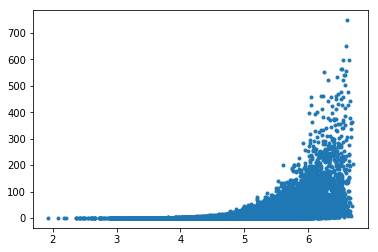

In [4]:
logE = np.log10(tau_energy)
plt.plot(logE, length, '.')

52066


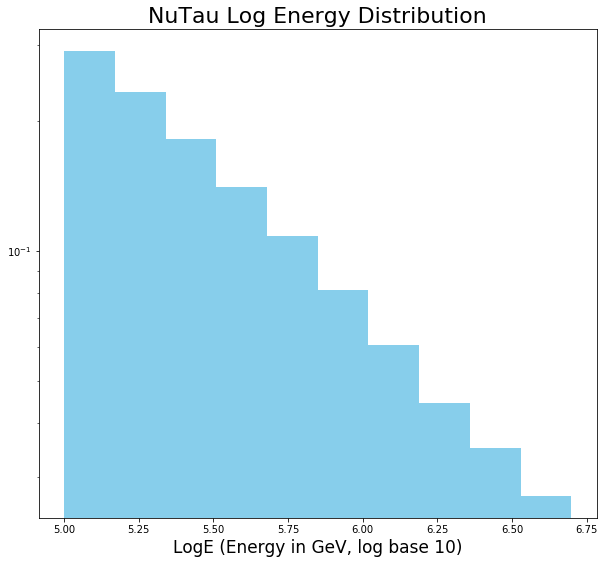

In [5]:
liveTime = 365*24*60*60
event_weight = sim_weight*liveTime/(len(infileList)*weightDict['NEvents'])
logE = np.log10(energy)
print(len(logE))
plt.figure(figsize=(10,9))
num, bins,_ = plt.hist(logE, log = True, weights=event_weight, color='skyblue')
#num1,bins1,_ = plt.hist(logE, histtype='step',log = True)
plt.title("NuTau Log Energy Distribution", fontsize=22)
plt.xlabel("LogE (Energy in GeV, log base 10)", fontsize=17)

In [6]:
sum(num)

1.2012880635889422

97962


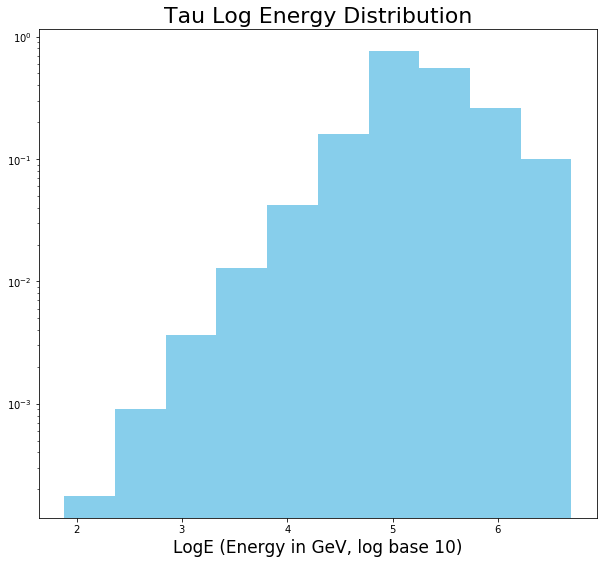

In [14]:
liveTime = 365*24*60*60
event_weight = sim_weight*liveTime/(len(infileList)*weightDict['NEvents'])
logE = np.log10(tau_energy)
print(len(logE))
plt.figure(figsize=(10,9))
num, bins,_ = plt.hist(logE, log = True, weights=event_weight, color='skyblue')
#num1,bins1,_ = plt.hist(logE, histtype='step',log = True)
plt.title("Tau Log Energy Distribution", fontsize=22)
plt.xlabel("LogE (Energy in GeV, log base 10)", fontsize=17)

9443


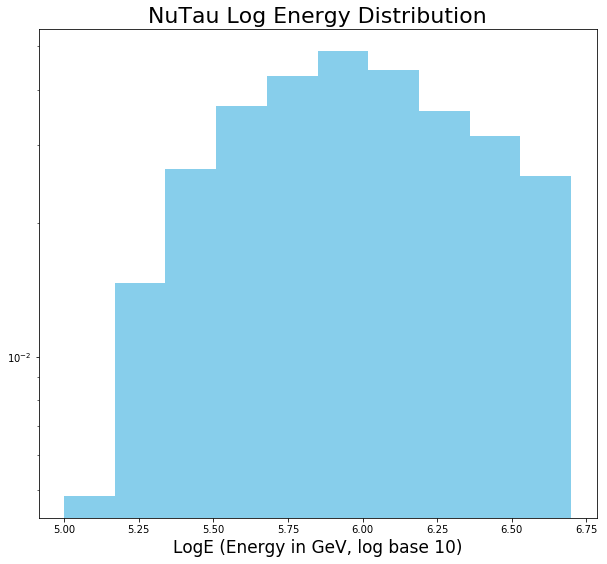

In [13]:
liveTime = 365*24*60*60
event_weight = sim_weight*liveTime/(len(infileList)*weightDict['NEvents'])
logE = np.log10(energy)
print(len(logE))
plt.figure(figsize=(10,9))
num, bins,_ = plt.hist(logE, log = True, weights=event_weight, color='skyblue')
#num1,bins1,_ = plt.hist(logE, histtype='step',log = True)
plt.title("NuTau Log Energy Distribution", fontsize=22)
plt.xlabel("LogE (Energy in GeV, log base 10)", fontsize=17)

In [10]:
weightDict['NEvents']

100.0

In [11]:
sum(num)

0.31152786675232846

In [34]:
1/0.297857465856925

3.35731050797413

1000.0

(array([2002., 1028.,  795.,  666.,  551.,  535.,  510.,  494.,  442.,
         399.]),
 array([1.91735590e-22, 1.01137939e-19, 2.02084143e-19, 3.03030347e-19,
        4.03976551e-19, 5.04922755e-19, 6.05868959e-19, 7.06815163e-19,
        8.07761367e-19, 9.08707571e-19, 1.00965377e-18]),
 <a list of 10 Patch objects>)

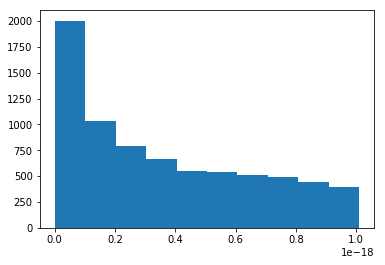

In [24]:
plt.hist(flux)

(array([762., 684., 707., 798., 755., 743., 726., 734., 782., 731.]),
 array([9.59559648e-16, 1.09617222e-14, 2.09638848e-14, 3.09660474e-14,
        4.09682099e-14, 5.09703725e-14, 6.09725351e-14, 7.09746976e-14,
        8.09768602e-14, 9.09790228e-14, 1.00981185e-13]),
 <a list of 10 Patch objects>)

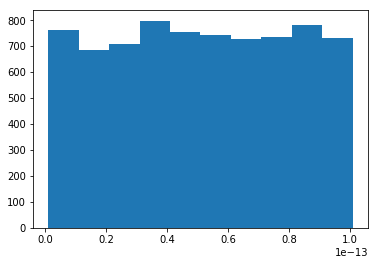

In [25]:
plt.hist(event_weight)

In [14]:
from icecube import dataclasses, dataio, icetray
from icecube.icetray import I3Units
from icecube.icetray import OMKey
import matplotlib.pyplot as plt
import scipy.constants as spc
import numpy as np

gcd_file = dataio.I3File('/home/users/akatil/P-ONE/GCD_files/PONE_Phase1.i3.gz')
cframe = gcd_file.pop_frame()
geometry = cframe["I3Geometry"]
omgeo = geometry.omgeo

sim_weight = ([])
flux = ([])
energy = ([])
nu = ([])
length = ([])
tau_energy = ([])

for file_num in range(0, 2000):
    file = dataio.I3File('/data/p-one/akatil/step_1_medium_water/tauDecay_5.0_6.7_PONE_Phase1_'+str(file_num)+'.i3.gz')
    #file = dataio.I3File('/data/p-one/akatil/step_1_medium_water/step_1_'+str(file_num)+'_PONE_Phase1_NuTau_NuE.i3.gz')
    for frame in file:
        primary = frame["NuGPrimary"]
        mctree = frame["I3MCTree"]
        mcTreeprimary = mctree.primaries
        #primary = mctree.primaries
        lepton = dataclasses.I3MCTree.first_child(mctree, mcTreeprimary[0].id)

        if lepton.type == 15 or lepton.type == -15:
            weightDict = frame["I3MCWeightDict"]
            weight = weightDict['OneWeight']
            tau_daughters = dataclasses.I3MCTree.get_daughters(mctree, lepton.id)
            tau_pos = lepton.pos
            x_tau_pos = tau_pos.x
            y_tau_pos = tau_pos.y
            z_tau_pos = tau_pos.z

            for td in range(0, len(tau_daughters)):
                if tau_daughters[td].type == 16 or tau_daughters[td].type == -16:
                    #print(tau_daughters[td])
                    tau_daughters_pos = tau_daughters[td].pos
                    x_td_pos = tau_daughters_pos.x
                    y_td_pos = tau_daughters_pos.y
                    z_td_pos = tau_daughters_pos.z
                    
            timeDiff = ([])
            for i in omgeo.keys():
                oKey = omgeo.get(i)
                domPos = oKey.position
                x_dom = domPos.x
                y_dom = domPos.y
                z_dom = domPos.z

                firstVertex = np.sqrt((x_dom - x_tau_pos)**2 + (y_dom - y_tau_pos)**2 + (z_dom - z_tau_pos)**2)
                secondVertex = np.sqrt((x_dom - x_td_pos)**2 + (y_dom - y_td_pos)**2 + (z_dom - z_td_pos)**2)
                
                if firstVertex <= 200 and secondVertex <= 200:
                    refractiveIndex = 1.333
                    speed_of_light_water = (spc.c)/refractiveIndex #[Units: m/seconds]
                    speed_of_light_ns = speed_of_light_water
                    #print(firstVertex-secondVertex)
                    tDiff_ns = ((firstVertex - secondVertex)/speed_of_light_water) * 1e9 #[Units: nanoseconds]
                    
                    if tDiff_ns >= 20 and tDiff_ns <= 200:
                        timeDiff = np.append(timeDiff, tDiff_ns)
                        
            if len(timeDiff) > 1:
                print('No of DOMs -', len(timeDiff))
                nu = np.append(nu, primary.type)
                energy = np.append(energy, primary.energy)
                f = astroFlux(primary.energy)
                flux = np.append(flux, f)
                sim_weight = np.append(sim_weight, simpleWeight(weight, f))
                length = np.append(length, lepton.length)
                tau_energy = np.append(tau_energy, lepton.energy)
                
                #print(tDiff_ns)

    print('file_number -', file_num)

('No of DOMs -', 2)
('No of DOMs -', 5)
('No of DOMs -', 8)
('No of DOMs -', 4)
('No of DOMs -', 4)
('No of DOMs -', 9)
('No of DOMs -', 4)
('file_number -', 0)
('No of DOMs -', 2)
('No of DOMs -', 13)
('No of DOMs -', 2)
('No of DOMs -', 6)
('file_number -', 1)
('No of DOMs -', 2)
('No of DOMs -', 15)
('No of DOMs -', 4)
('No of DOMs -', 4)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 5)
('No of DOMs -', 4)
('file_number -', 2)
('No of DOMs -', 6)
('No of DOMs -', 4)
('No of DOMs -', 9)
('No of DOMs -', 3)
('No of DOMs -', 4)
('No of DOMs -', 4)
('No of DOMs -', 11)
('No of DOMs -', 6)
('file_number -', 3)
('No of DOMs -', 2)
('No of DOMs -', 4)
('No of DOMs -', 5)
('No of DOMs -', 6)
('No of DOMs -', 4)
('No of DOMs -', 3)
('No of DOMs -', 3)
('No of DOMs -', 6)
('file_number -', 4)
('No of DOMs -', 3)
('No of DOMs -', 7)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 14)
('No of DOMs -', 2)
('No of DOMs -', 4)
('No of DOMs -', 10)
('No of DOMs -', 8)
('No of DO

('No of DOMs -', 7)
('No of DOMs -', 6)
('No of DOMs -', 6)
('No of DOMs -', 2)
('No of DOMs -', 5)
('No of DOMs -', 11)
('No of DOMs -', 10)
('file_number -', 46)
('No of DOMs -', 2)
('No of DOMs -', 12)
('No of DOMs -', 3)
('No of DOMs -', 4)
('file_number -', 47)
('No of DOMs -', 7)
('No of DOMs -', 4)
('No of DOMs -', 3)
('No of DOMs -', 6)
('No of DOMs -', 14)
('No of DOMs -', 3)
('No of DOMs -', 5)
('file_number -', 48)
('No of DOMs -', 2)
('No of DOMs -', 9)
('No of DOMs -', 9)
('No of DOMs -', 6)
('No of DOMs -', 16)
('No of DOMs -', 5)
('No of DOMs -', 8)
('No of DOMs -', 3)
('No of DOMs -', 2)
('file_number -', 49)
('No of DOMs -', 12)
('No of DOMs -', 5)
('No of DOMs -', 6)
('No of DOMs -', 4)
('No of DOMs -', 6)
('file_number -', 50)
('No of DOMs -', 5)
('No of DOMs -', 7)
('No of DOMs -', 3)
('file_number -', 51)
('No of DOMs -', 6)
('No of DOMs -', 8)
('No of DOMs -', 10)
('No of DOMs -', 8)
('No of DOMs -', 15)
('No of DOMs -', 8)
('file_number -', 52)
('No of DOMs -', 1

('No of DOMs -', 5)
('No of DOMs -', 3)
('file_number -', 95)
('No of DOMs -', 2)
('No of DOMs -', 12)
('No of DOMs -', 2)
('No of DOMs -', 5)
('No of DOMs -', 5)
('No of DOMs -', 6)
('No of DOMs -', 3)
('No of DOMs -', 10)
('No of DOMs -', 4)
('No of DOMs -', 5)
('No of DOMs -', 4)
('No of DOMs -', 4)
('No of DOMs -', 2)
('file_number -', 96)
('No of DOMs -', 6)
('No of DOMs -', 8)
('No of DOMs -', 11)
('No of DOMs -', 4)
('No of DOMs -', 4)
('No of DOMs -', 7)
('No of DOMs -', 3)
('No of DOMs -', 3)
('file_number -', 97)
('No of DOMs -', 10)
('No of DOMs -', 5)
('No of DOMs -', 10)
('No of DOMs -', 7)
('No of DOMs -', 4)
('No of DOMs -', 6)
('file_number -', 98)
('No of DOMs -', 5)
('No of DOMs -', 4)
('No of DOMs -', 2)
('No of DOMs -', 2)
('No of DOMs -', 11)
('No of DOMs -', 8)
('No of DOMs -', 5)
('No of DOMs -', 9)
('No of DOMs -', 8)
('No of DOMs -', 6)
('file_number -', 99)
('No of DOMs -', 4)
('No of DOMs -', 6)
('No of DOMs -', 2)
('No of DOMs -', 6)
('No of DOMs -', 5)
('No

('No of DOMs -', 2)
('file_number -', 142)
('No of DOMs -', 3)
('No of DOMs -', 10)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 16)
('No of DOMs -', 15)
('file_number -', 143)
('No of DOMs -', 12)
('No of DOMs -', 4)
('No of DOMs -', 2)
('No of DOMs -', 5)
('No of DOMs -', 6)
('No of DOMs -', 13)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 2)
('No of DOMs -', 4)
('file_number -', 144)
('No of DOMs -', 2)
('No of DOMs -', 3)
('No of DOMs -', 8)
('No of DOMs -', 4)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 2)
('No of DOMs -', 3)
('file_number -', 145)
('No of DOMs -', 5)
('No of DOMs -', 4)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 2)
('No of DOMs -', 4)
('No of DOMs -', 12)
('No of DOMs -', 13)
('No of DOMs -', 7)
('No of DOMs -', 4)
('No of DOMs -', 7)
('No of DOMs -', 2)
('file_number -', 146)
('No of DOMs -', 7)
('No of DOMs -', 2)
('No of DOMs -', 13)
('No of DOMs -', 12)
('file_number -', 147)
('No of DOMs -', 15)
('No of DOMs

('No of DOMs -', 7)
('No of DOMs -', 5)
('No of DOMs -', 6)
('No of DOMs -', 5)
('No of DOMs -', 10)
('No of DOMs -', 4)
('No of DOMs -', 3)
('file_number -', 190)
('No of DOMs -', 3)
('No of DOMs -', 5)
('No of DOMs -', 8)
('No of DOMs -', 11)
('No of DOMs -', 8)
('No of DOMs -', 9)
('No of DOMs -', 3)
('No of DOMs -', 5)
('file_number -', 191)
('No of DOMs -', 7)
('No of DOMs -', 7)
('No of DOMs -', 6)
('No of DOMs -', 3)
('No of DOMs -', 8)
('No of DOMs -', 4)
('No of DOMs -', 6)
('file_number -', 192)
('No of DOMs -', 11)
('No of DOMs -', 4)
('No of DOMs -', 4)
('No of DOMs -', 6)
('No of DOMs -', 4)
('No of DOMs -', 9)
('No of DOMs -', 4)
('No of DOMs -', 13)
('No of DOMs -', 3)
('file_number -', 193)
('No of DOMs -', 3)
('No of DOMs -', 5)
('No of DOMs -', 4)
('No of DOMs -', 11)
('No of DOMs -', 4)
('No of DOMs -', 13)
('No of DOMs -', 6)
('No of DOMs -', 6)
('No of DOMs -', 5)
('file_number -', 194)
('No of DOMs -', 7)
('No of DOMs -', 12)
('No of DOMs -', 4)
('No of DOMs -', 1

('No of DOMs -', 4)
('No of DOMs -', 2)
('No of DOMs -', 7)
('No of DOMs -', 3)
('No of DOMs -', 9)
('file_number -', 235)
('No of DOMs -', 4)
('No of DOMs -', 3)
('No of DOMs -', 4)
('No of DOMs -', 3)
('No of DOMs -', 8)
('No of DOMs -', 6)
('No of DOMs -', 4)
('No of DOMs -', 5)
('No of DOMs -', 6)
('No of DOMs -', 4)
('No of DOMs -', 3)
('file_number -', 236)
('No of DOMs -', 10)
('No of DOMs -', 12)
('No of DOMs -', 13)
('No of DOMs -', 8)
('No of DOMs -', 6)
('No of DOMs -', 3)
('No of DOMs -', 3)
('file_number -', 237)
('No of DOMs -', 7)
('No of DOMs -', 8)
('No of DOMs -', 6)
('No of DOMs -', 3)
('No of DOMs -', 3)
('No of DOMs -', 11)
('No of DOMs -', 3)
('file_number -', 238)
('No of DOMs -', 4)
('No of DOMs -', 6)
('No of DOMs -', 7)
('file_number -', 239)
('No of DOMs -', 8)
('No of DOMs -', 13)
('No of DOMs -', 2)
('No of DOMs -', 5)
('No of DOMs -', 10)
('No of DOMs -', 6)
('No of DOMs -', 5)
('No of DOMs -', 2)
('No of DOMs -', 2)
('No of DOMs -', 16)
('No of DOMs -', 2

('No of DOMs -', 8)
('No of DOMs -', 10)
('No of DOMs -', 7)
('No of DOMs -', 4)
('file_number -', 279)
('No of DOMs -', 2)
('No of DOMs -', 6)
('No of DOMs -', 6)
('No of DOMs -', 2)
('file_number -', 280)
('No of DOMs -', 2)
('No of DOMs -', 2)
('No of DOMs -', 5)
('No of DOMs -', 19)
('No of DOMs -', 12)
('No of DOMs -', 6)
('No of DOMs -', 5)
('No of DOMs -', 5)
('No of DOMs -', 3)
('No of DOMs -', 5)
('file_number -', 281)
('No of DOMs -', 6)
('No of DOMs -', 3)
('No of DOMs -', 4)
('No of DOMs -', 6)
('No of DOMs -', 5)
('No of DOMs -', 5)
('file_number -', 282)
('No of DOMs -', 17)
('No of DOMs -', 5)
('No of DOMs -', 3)
('No of DOMs -', 11)
('No of DOMs -', 9)
('No of DOMs -', 9)
('No of DOMs -', 11)
('file_number -', 283)
('No of DOMs -', 4)
('No of DOMs -', 10)
('No of DOMs -', 2)
('No of DOMs -', 5)
('file_number -', 284)
('No of DOMs -', 2)
('No of DOMs -', 5)
('No of DOMs -', 2)
('No of DOMs -', 6)
('No of DOMs -', 5)
('No of DOMs -', 4)
('No of DOMs -', 8)
('No of DOMs -'

('No of DOMs -', 2)
('No of DOMs -', 11)
('No of DOMs -', 6)
('file_number -', 327)
('No of DOMs -', 14)
('No of DOMs -', 4)
('No of DOMs -', 3)
('No of DOMs -', 4)
('No of DOMs -', 10)
('No of DOMs -', 7)
('No of DOMs -', 3)
('No of DOMs -', 11)
('No of DOMs -', 6)
('file_number -', 328)
('No of DOMs -', 9)
('No of DOMs -', 9)
('No of DOMs -', 14)
('No of DOMs -', 15)
('No of DOMs -', 4)
('No of DOMs -', 10)
('No of DOMs -', 5)
('file_number -', 329)
('No of DOMs -', 11)
('No of DOMs -', 2)
('No of DOMs -', 7)
('No of DOMs -', 5)
('No of DOMs -', 5)
('No of DOMs -', 11)
('No of DOMs -', 7)
('No of DOMs -', 12)
('No of DOMs -', 15)
('file_number -', 330)
('No of DOMs -', 2)
('No of DOMs -', 9)
('No of DOMs -', 2)
('No of DOMs -', 10)
('No of DOMs -', 6)
('file_number -', 331)
('No of DOMs -', 8)
('No of DOMs -', 14)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 7)
('No of DOMs -', 4)
('No of DOMs -', 5)
('file_number -', 332)
('No of DOMs -', 10)
('No of DOMs -', 5)
('No of 

('No of DOMs -', 3)
('No of DOMs -', 8)
('No of DOMs -', 4)
('No of DOMs -', 2)
('No of DOMs -', 3)
('No of DOMs -', 7)
('No of DOMs -', 4)
('No of DOMs -', 2)
('No of DOMs -', 6)
('No of DOMs -', 5)
('file_number -', 374)
('No of DOMs -', 4)
('No of DOMs -', 8)
('No of DOMs -', 6)
('No of DOMs -', 6)
('No of DOMs -', 6)
('file_number -', 375)
('No of DOMs -', 15)
('No of DOMs -', 2)
('No of DOMs -', 10)
('No of DOMs -', 2)
('No of DOMs -', 7)
('file_number -', 376)
('No of DOMs -', 3)
('No of DOMs -', 6)
('No of DOMs -', 8)
('No of DOMs -', 4)
('No of DOMs -', 8)
('No of DOMs -', 5)
('No of DOMs -', 3)
('No of DOMs -', 3)
('No of DOMs -', 6)
('No of DOMs -', 3)
('No of DOMs -', 3)
('No of DOMs -', 13)
('file_number -', 377)
('No of DOMs -', 5)
('No of DOMs -', 7)
('No of DOMs -', 2)
('No of DOMs -', 4)
('No of DOMs -', 14)
('No of DOMs -', 16)
('No of DOMs -', 4)
('No of DOMs -', 3)
('No of DOMs -', 4)
('file_number -', 378)
('No of DOMs -', 7)
('No of DOMs -', 4)
('No of DOMs -', 5)


('No of DOMs -', 5)
('No of DOMs -', 3)
('No of DOMs -', 3)
('No of DOMs -', 4)
('No of DOMs -', 6)
('No of DOMs -', 12)
('No of DOMs -', 2)
('No of DOMs -', 5)
('file_number -', 419)
('No of DOMs -', 2)
('No of DOMs -', 2)
('No of DOMs -', 6)
('No of DOMs -', 4)
('No of DOMs -', 4)
('No of DOMs -', 5)
('No of DOMs -', 2)
('No of DOMs -', 11)
('No of DOMs -', 2)
('No of DOMs -', 6)
('file_number -', 420)
('No of DOMs -', 14)
('No of DOMs -', 11)
('No of DOMs -', 11)
('No of DOMs -', 11)
('No of DOMs -', 18)
('No of DOMs -', 4)
('No of DOMs -', 11)
('No of DOMs -', 2)
('file_number -', 421)
('No of DOMs -', 5)
('No of DOMs -', 10)
('No of DOMs -', 6)
('No of DOMs -', 2)
('No of DOMs -', 16)
('No of DOMs -', 3)
('No of DOMs -', 10)
('No of DOMs -', 12)
('file_number -', 422)
('No of DOMs -', 4)
('No of DOMs -', 7)
('No of DOMs -', 11)
('No of DOMs -', 4)
('No of DOMs -', 2)
('No of DOMs -', 3)
('No of DOMs -', 8)
('No of DOMs -', 3)
('No of DOMs -', 6)
('file_number -', 423)
('No of DOMs

('No of DOMs -', 10)
('file_number -', 466)
('No of DOMs -', 7)
('No of DOMs -', 4)
('No of DOMs -', 3)
('No of DOMs -', 9)
('No of DOMs -', 9)
('No of DOMs -', 3)
('No of DOMs -', 3)
('No of DOMs -', 5)
('No of DOMs -', 4)
('file_number -', 467)
('No of DOMs -', 2)
('No of DOMs -', 3)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 4)
('No of DOMs -', 2)
('No of DOMs -', 12)
('No of DOMs -', 7)
('No of DOMs -', 5)
('file_number -', 468)
('No of DOMs -', 3)
('No of DOMs -', 3)
('No of DOMs -', 9)
('No of DOMs -', 10)
('No of DOMs -', 6)
('No of DOMs -', 5)
('No of DOMs -', 6)
('No of DOMs -', 6)
('No of DOMs -', 4)
('No of DOMs -', 7)
('file_number -', 469)
('No of DOMs -', 9)
('No of DOMs -', 6)
('No of DOMs -', 3)
('No of DOMs -', 12)
('No of DOMs -', 3)
('No of DOMs -', 10)
('No of DOMs -', 6)
('No of DOMs -', 3)
('file_number -', 470)
('No of DOMs -', 14)
('No of DOMs -', 5)
('No of DOMs -', 13)
('No of DOMs -', 4)
('No of DOMs -', 6)
('No of DOMs -', 4)
('No of DOMs -', 3

('No of DOMs -', 4)
('No of DOMs -', 5)
('file_number -', 510)
('No of DOMs -', 5)
('No of DOMs -', 5)
('No of DOMs -', 5)
('file_number -', 511)
('No of DOMs -', 2)
('No of DOMs -', 8)
('No of DOMs -', 4)
('No of DOMs -', 5)
('No of DOMs -', 8)
('No of DOMs -', 9)
('No of DOMs -', 13)
('No of DOMs -', 5)
('file_number -', 512)
('No of DOMs -', 4)
('No of DOMs -', 13)
('No of DOMs -', 4)
('No of DOMs -', 4)
('No of DOMs -', 11)
('No of DOMs -', 6)
('No of DOMs -', 6)
('No of DOMs -', 4)
('No of DOMs -', 14)
('file_number -', 513)
('No of DOMs -', 6)
('No of DOMs -', 4)
('No of DOMs -', 5)
('file_number -', 514)
('No of DOMs -', 4)
('No of DOMs -', 11)
('No of DOMs -', 6)
('No of DOMs -', 2)
('No of DOMs -', 4)
('No of DOMs -', 6)
('No of DOMs -', 11)
('No of DOMs -', 3)
('file_number -', 515)
('No of DOMs -', 4)
('No of DOMs -', 11)
('No of DOMs -', 8)
('No of DOMs -', 7)
('file_number -', 516)
('No of DOMs -', 2)
('No of DOMs -', 3)
('No of DOMs -', 7)
('No of DOMs -', 10)
('No of DOM

('No of DOMs -', 9)
('No of DOMs -', 5)
('file_number -', 556)
('No of DOMs -', 7)
('No of DOMs -', 3)
('No of DOMs -', 6)
('No of DOMs -', 5)
('file_number -', 557)
('No of DOMs -', 2)
('No of DOMs -', 2)
('No of DOMs -', 2)
('No of DOMs -', 2)
('No of DOMs -', 2)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 11)
('file_number -', 558)
('No of DOMs -', 12)
('No of DOMs -', 5)
('No of DOMs -', 2)
('No of DOMs -', 4)
('No of DOMs -', 6)
('file_number -', 559)
('No of DOMs -', 3)
('No of DOMs -', 4)
('No of DOMs -', 5)
('No of DOMs -', 6)
('No of DOMs -', 6)
('No of DOMs -', 2)
('No of DOMs -', 16)
('No of DOMs -', 12)
('No of DOMs -', 3)
('No of DOMs -', 4)
('file_number -', 560)
('No of DOMs -', 3)
('No of DOMs -', 4)
('No of DOMs -', 2)
('No of DOMs -', 6)
('No of DOMs -', 3)
('No of DOMs -', 4)
('No of DOMs -', 6)
('No of DOMs -', 4)
('No of DOMs -', 17)
('No of DOMs -', 4)
('No of DOMs -', 4)
('No of DOMs -', 9)
('file_number -', 561)
('No of DOMs -', 9)
('No of DOMs -', 

('No of DOMs -', 6)
('No of DOMs -', 2)
('No of DOMs -', 4)
('No of DOMs -', 10)
('No of DOMs -', 2)
('No of DOMs -', 4)
('No of DOMs -', 7)
('No of DOMs -', 2)
('No of DOMs -', 2)
('file_number -', 601)
('No of DOMs -', 7)
('No of DOMs -', 6)
('No of DOMs -', 12)
('No of DOMs -', 4)
('No of DOMs -', 6)
('No of DOMs -', 5)
('No of DOMs -', 13)
('No of DOMs -', 6)
('No of DOMs -', 4)
('No of DOMs -', 6)
('file_number -', 602)
('No of DOMs -', 11)
('No of DOMs -', 10)
('No of DOMs -', 8)
('No of DOMs -', 3)
('No of DOMs -', 9)
('No of DOMs -', 2)
('No of DOMs -', 3)
('file_number -', 603)
('No of DOMs -', 6)
('No of DOMs -', 16)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 11)
('No of DOMs -', 4)
('No of DOMs -', 7)
('No of DOMs -', 8)
('file_number -', 604)
('No of DOMs -', 4)
('No of DOMs -', 9)
('No of DOMs -', 5)
('No of DOMs -', 2)
('No of DOMs -', 3)
('No of DOMs -', 13)
('No of DOMs -', 2)
('No of DOMs -', 16)
('No of DOMs -', 12)
('file_number -', 605)
('No of DOMs -'

('No of DOMs -', 10)
('file_number -', 646)
('No of DOMs -', 5)
('No of DOMs -', 6)
('No of DOMs -', 2)
('No of DOMs -', 5)
('No of DOMs -', 4)
('No of DOMs -', 6)
('No of DOMs -', 6)
('No of DOMs -', 5)
('No of DOMs -', 4)
('No of DOMs -', 4)
('file_number -', 647)
('No of DOMs -', 17)
('No of DOMs -', 14)
('No of DOMs -', 7)
('No of DOMs -', 4)
('No of DOMs -', 3)
('No of DOMs -', 7)
('No of DOMs -', 5)
('No of DOMs -', 2)
('file_number -', 648)
('No of DOMs -', 8)
('No of DOMs -', 6)
('No of DOMs -', 5)
('No of DOMs -', 7)
('No of DOMs -', 3)
('No of DOMs -', 10)
('No of DOMs -', 6)
('file_number -', 649)
('No of DOMs -', 9)
('No of DOMs -', 6)
('No of DOMs -', 2)
('No of DOMs -', 12)
('No of DOMs -', 3)
('No of DOMs -', 8)
('No of DOMs -', 6)
('No of DOMs -', 7)
('file_number -', 650)
('No of DOMs -', 5)
('No of DOMs -', 3)
('No of DOMs -', 4)
('No of DOMs -', 9)
('No of DOMs -', 5)
('file_number -', 651)
('No of DOMs -', 5)
('No of DOMs -', 3)
('No of DOMs -', 6)
('No of DOMs -', 

('No of DOMs -', 7)
('No of DOMs -', 12)
('No of DOMs -', 14)
('No of DOMs -', 5)
('file_number -', 692)
('No of DOMs -', 5)
('No of DOMs -', 2)
('No of DOMs -', 6)
('No of DOMs -', 8)
('No of DOMs -', 8)
('No of DOMs -', 5)
('No of DOMs -', 4)
('No of DOMs -', 13)
('file_number -', 693)
('No of DOMs -', 3)
('No of DOMs -', 12)
('No of DOMs -', 9)
('No of DOMs -', 9)
('No of DOMs -', 5)
('No of DOMs -', 7)
('file_number -', 694)
('No of DOMs -', 6)
('No of DOMs -', 3)
('No of DOMs -', 14)
('No of DOMs -', 12)
('No of DOMs -', 5)
('No of DOMs -', 2)
('No of DOMs -', 8)
('No of DOMs -', 7)
('file_number -', 695)
('No of DOMs -', 6)
('No of DOMs -', 2)
('No of DOMs -', 12)
('No of DOMs -', 5)
('No of DOMs -', 3)
('No of DOMs -', 6)
('No of DOMs -', 3)
('No of DOMs -', 3)
('No of DOMs -', 4)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 3)
('No of DOMs -', 3)
('file_number -', 696)
('No of DOMs -', 4)
('No of DOMs -', 8)
('No of DOMs -', 7)
('No of DOMs -', 2)
('No of DOMs -', 1

('No of DOMs -', 2)
('No of DOMs -', 6)
('No of DOMs -', 7)
('file_number -', 735)
('No of DOMs -', 2)
('No of DOMs -', 12)
('No of DOMs -', 3)
('No of DOMs -', 6)
('No of DOMs -', 5)
('No of DOMs -', 7)
('No of DOMs -', 2)
('file_number -', 736)
('No of DOMs -', 13)
('No of DOMs -', 12)
('No of DOMs -', 2)
('No of DOMs -', 8)
('No of DOMs -', 13)
('No of DOMs -', 4)
('No of DOMs -', 2)
('No of DOMs -', 4)
('No of DOMs -', 5)
('No of DOMs -', 6)
('file_number -', 737)
('No of DOMs -', 2)
('No of DOMs -', 2)
('No of DOMs -', 5)
('No of DOMs -', 8)
('No of DOMs -', 8)
('No of DOMs -', 8)
('No of DOMs -', 6)
('No of DOMs -', 2)
('No of DOMs -', 4)
('No of DOMs -', 8)
('No of DOMs -', 14)
('No of DOMs -', 9)
('file_number -', 738)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 7)
('No of DOMs -', 4)
('No of DOMs -', 5)
('No of DOMs -', 5)
('file_number -', 739)
('No of DOMs -', 6)
('No of DOMs -', 8)
('No of DOMs -', 3)
('No of DOMs -', 6)
('No of DOMs -', 8)
('No of DOMs -', 3)


('No of DOMs -', 8)
('No of DOMs -', 7)
('No of DOMs -', 5)
('No of DOMs -', 3)
('No of DOMs -', 4)
('file_number -', 779)
('No of DOMs -', 3)
('No of DOMs -', 3)
('No of DOMs -', 4)
('No of DOMs -', 2)
('No of DOMs -', 11)
('No of DOMs -', 4)
('No of DOMs -', 4)
('No of DOMs -', 11)
('file_number -', 780)
('No of DOMs -', 8)
('No of DOMs -', 9)
('No of DOMs -', 7)
('No of DOMs -', 7)
('No of DOMs -', 8)
('No of DOMs -', 15)
('No of DOMs -', 2)
('file_number -', 781)
('No of DOMs -', 3)
('No of DOMs -', 6)
('No of DOMs -', 6)
('No of DOMs -', 4)
('No of DOMs -', 4)
('No of DOMs -', 14)
('No of DOMs -', 7)
('file_number -', 782)
('No of DOMs -', 10)
('No of DOMs -', 4)
('No of DOMs -', 7)
('No of DOMs -', 5)
('No of DOMs -', 5)
('file_number -', 783)
('No of DOMs -', 8)
('No of DOMs -', 12)
('No of DOMs -', 13)
('No of DOMs -', 7)
('No of DOMs -', 5)
('No of DOMs -', 6)
('No of DOMs -', 4)
('file_number -', 784)
('No of DOMs -', 12)
('No of DOMs -', 10)
('No of DOMs -', 5)
('No of DOMs 

('No of DOMs -', 7)
('No of DOMs -', 11)
('No of DOMs -', 6)
('No of DOMs -', 2)
('No of DOMs -', 2)
('No of DOMs -', 6)
('No of DOMs -', 2)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 5)
('file_number -', 826)
('No of DOMs -', 13)
('No of DOMs -', 3)
('No of DOMs -', 5)
('No of DOMs -', 10)
('No of DOMs -', 4)
('No of DOMs -', 6)
('No of DOMs -', 2)
('No of DOMs -', 7)
('No of DOMs -', 2)
('file_number -', 827)
('No of DOMs -', 12)
('No of DOMs -', 12)
('No of DOMs -', 5)
('No of DOMs -', 3)
('No of DOMs -', 4)
('No of DOMs -', 3)
('No of DOMs -', 7)
('No of DOMs -', 7)
('file_number -', 828)
('No of DOMs -', 12)
('No of DOMs -', 14)
('No of DOMs -', 11)
('No of DOMs -', 3)
('No of DOMs -', 7)
('No of DOMs -', 11)
('No of DOMs -', 10)
('No of DOMs -', 8)
('No of DOMs -', 13)
('No of DOMs -', 9)
('No of DOMs -', 4)
('file_number -', 829)
('No of DOMs -', 3)
('No of DOMs -', 3)
('No of DOMs -', 15)
('No of DOMs -', 10)
('No of DOMs -', 2)
('No of DOMs -', 17)
('file_number 

('No of DOMs -', 2)
('No of DOMs -', 4)
('file_number -', 873)
('No of DOMs -', 5)
('No of DOMs -', 2)
('No of DOMs -', 7)
('No of DOMs -', 3)
('No of DOMs -', 3)
('No of DOMs -', 4)
('No of DOMs -', 10)
('No of DOMs -', 8)
('file_number -', 874)
('No of DOMs -', 2)
('No of DOMs -', 7)
('No of DOMs -', 7)
('No of DOMs -', 4)
('No of DOMs -', 3)
('No of DOMs -', 6)
('No of DOMs -', 10)
('No of DOMs -', 3)
('No of DOMs -', 9)
('No of DOMs -', 10)
('No of DOMs -', 9)
('No of DOMs -', 4)
('No of DOMs -', 8)
('No of DOMs -', 8)
('No of DOMs -', 5)
('file_number -', 875)
('No of DOMs -', 2)
('No of DOMs -', 2)
('No of DOMs -', 16)
('No of DOMs -', 10)
('No of DOMs -', 8)
('No of DOMs -', 11)
('No of DOMs -', 4)
('file_number -', 876)
('No of DOMs -', 5)
('No of DOMs -', 6)
('No of DOMs -', 6)
('No of DOMs -', 5)
('No of DOMs -', 9)
('No of DOMs -', 2)
('No of DOMs -', 5)
('No of DOMs -', 2)
('No of DOMs -', 4)
('file_number -', 877)
('No of DOMs -', 4)
('No of DOMs -', 12)
('No of DOMs -', 3

('No of DOMs -', 2)
('No of DOMs -', 5)
('file_number -', 919)
('No of DOMs -', 2)
('No of DOMs -', 4)
('No of DOMs -', 3)
('No of DOMs -', 8)
('No of DOMs -', 2)
('No of DOMs -', 6)
('No of DOMs -', 12)
('No of DOMs -', 6)
('file_number -', 920)
('No of DOMs -', 5)
('No of DOMs -', 6)
('No of DOMs -', 6)
('No of DOMs -', 5)
('No of DOMs -', 11)
('No of DOMs -', 3)
('No of DOMs -', 3)
('No of DOMs -', 15)
('No of DOMs -', 9)
('No of DOMs -', 7)
('No of DOMs -', 5)
('file_number -', 921)
('No of DOMs -', 7)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 5)
('No of DOMs -', 7)
('No of DOMs -', 5)
('No of DOMs -', 5)
('file_number -', 922)
('No of DOMs -', 4)
('No of DOMs -', 6)
('No of DOMs -', 3)
('No of DOMs -', 6)
('No of DOMs -', 5)
('No of DOMs -', 2)
('No of DOMs -', 3)
('No of DOMs -', 3)
('No of DOMs -', 4)
('file_number -', 923)
('No of DOMs -', 2)
('No of DOMs -', 8)
('No of DOMs -', 6)
('No of DOMs -', 9)
('No of DOMs -', 13)
('No of DOMs -', 2)
('file_number -', 924

('No of DOMs -', 3)
('No of DOMs -', 10)
('No of DOMs -', 11)
('No of DOMs -', 6)
('No of DOMs -', 12)
('No of DOMs -', 2)
('No of DOMs -', 15)
('file_number -', 964)
('No of DOMs -', 2)
('No of DOMs -', 3)
('No of DOMs -', 14)
('No of DOMs -', 12)
('No of DOMs -', 10)
('file_number -', 965)
('No of DOMs -', 6)
('No of DOMs -', 6)
('No of DOMs -', 5)
('No of DOMs -', 2)
('No of DOMs -', 5)
('No of DOMs -', 10)
('No of DOMs -', 2)
('No of DOMs -', 3)
('No of DOMs -', 5)
('No of DOMs -', 5)
('file_number -', 966)
('No of DOMs -', 16)
('No of DOMs -', 10)
('No of DOMs -', 8)
('No of DOMs -', 2)
('No of DOMs -', 5)
('No of DOMs -', 3)
('No of DOMs -', 16)
('No of DOMs -', 2)
('file_number -', 967)
('No of DOMs -', 3)
('No of DOMs -', 12)
('No of DOMs -', 3)
('No of DOMs -', 6)
('No of DOMs -', 6)
('file_number -', 968)
('No of DOMs -', 5)
('No of DOMs -', 3)
('No of DOMs -', 5)
('No of DOMs -', 6)
('file_number -', 969)
('No of DOMs -', 7)
('No of DOMs -', 23)
('No of DOMs -', 6)
('No of D

('No of DOMs -', 2)
('No of DOMs -', 7)
('No of DOMs -', 13)
('No of DOMs -', 8)
('No of DOMs -', 8)
('No of DOMs -', 5)
('file_number -', 1010)
('No of DOMs -', 11)
('No of DOMs -', 9)
('No of DOMs -', 11)
('file_number -', 1011)
('No of DOMs -', 2)
('No of DOMs -', 7)
('No of DOMs -', 6)
('No of DOMs -', 9)
('No of DOMs -', 8)
('No of DOMs -', 15)
('No of DOMs -', 2)
('No of DOMs -', 3)
('file_number -', 1012)
('No of DOMs -', 2)
('No of DOMs -', 6)
('No of DOMs -', 3)
('No of DOMs -', 4)
('No of DOMs -', 7)
('No of DOMs -', 2)
('No of DOMs -', 3)
('file_number -', 1013)
('No of DOMs -', 12)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 2)
('No of DOMs -', 9)
('No of DOMs -', 15)
('No of DOMs -', 2)
('file_number -', 1014)
('No of DOMs -', 2)
('No of DOMs -', 5)
('No of DOMs -', 2)
('No of DOMs -', 2)
('No of DOMs -', 18)
('No of DOMs -', 5)
('file_number -', 1015)
('No of DOMs -', 4)
('No of DOMs -', 16)
('No of DOMs -', 6)
('No of DOMs -', 6)
('No of DOMs -', 7)
('No of 

('file_number -', 1057)
('No of DOMs -', 8)
('No of DOMs -', 15)
('No of DOMs -', 3)
('No of DOMs -', 4)
('No of DOMs -', 2)
('No of DOMs -', 8)
('No of DOMs -', 9)
('No of DOMs -', 6)
('No of DOMs -', 10)
('No of DOMs -', 5)
('No of DOMs -', 3)
('No of DOMs -', 5)
('file_number -', 1058)
('No of DOMs -', 2)
('No of DOMs -', 5)
('No of DOMs -', 3)
('No of DOMs -', 15)
('No of DOMs -', 13)
('No of DOMs -', 6)
('No of DOMs -', 4)
('file_number -', 1059)
('No of DOMs -', 3)
('No of DOMs -', 4)
('No of DOMs -', 6)
('No of DOMs -', 2)
('No of DOMs -', 4)
('No of DOMs -', 2)
('No of DOMs -', 12)
('No of DOMs -', 15)
('No of DOMs -', 12)
('file_number -', 1060)
('No of DOMs -', 6)
('No of DOMs -', 17)
('No of DOMs -', 7)
('No of DOMs -', 3)
('No of DOMs -', 7)
('file_number -', 1061)
('No of DOMs -', 10)
('No of DOMs -', 15)
('No of DOMs -', 12)
('No of DOMs -', 9)
('No of DOMs -', 5)
('No of DOMs -', 15)
('No of DOMs -', 3)
('No of DOMs -', 7)
('file_number -', 1062)
('No of DOMs -', 11)
('N

('No of DOMs -', 12)
('No of DOMs -', 11)
('No of DOMs -', 4)
('file_number -', 1101)
('No of DOMs -', 2)
('No of DOMs -', 2)
('No of DOMs -', 6)
('No of DOMs -', 11)
('No of DOMs -', 6)
('No of DOMs -', 6)
('No of DOMs -', 4)
('file_number -', 1102)
('No of DOMs -', 7)
('No of DOMs -', 15)
('No of DOMs -', 8)
('No of DOMs -', 2)
('No of DOMs -', 3)
('No of DOMs -', 6)
('No of DOMs -', 9)
('No of DOMs -', 6)
('No of DOMs -', 14)
('file_number -', 1103)
('No of DOMs -', 6)
('No of DOMs -', 14)
('No of DOMs -', 4)
('No of DOMs -', 2)
('No of DOMs -', 10)
('No of DOMs -', 6)
('No of DOMs -', 4)
('No of DOMs -', 8)
('No of DOMs -', 5)
('No of DOMs -', 19)
('No of DOMs -', 5)
('file_number -', 1104)
('No of DOMs -', 4)
('No of DOMs -', 5)
('No of DOMs -', 10)
('No of DOMs -', 5)
('No of DOMs -', 11)
('No of DOMs -', 6)
('No of DOMs -', 2)
('No of DOMs -', 4)
('file_number -', 1105)
('No of DOMs -', 3)
('No of DOMs -', 9)
('No of DOMs -', 3)
('No of DOMs -', 9)
('No of DOMs -', 3)
('No of DO

('No of DOMs -', 2)
('No of DOMs -', 12)
('No of DOMs -', 7)
('No of DOMs -', 6)
('No of DOMs -', 5)
('file_number -', 1146)
('No of DOMs -', 12)
('No of DOMs -', 8)
('No of DOMs -', 4)
('No of DOMs -', 2)
('No of DOMs -', 2)
('No of DOMs -', 12)
('No of DOMs -', 2)
('No of DOMs -', 2)
('file_number -', 1147)
('No of DOMs -', 13)
('No of DOMs -', 2)
('No of DOMs -', 4)
('No of DOMs -', 5)
('No of DOMs -', 12)
('No of DOMs -', 6)
('file_number -', 1148)
('No of DOMs -', 8)
('No of DOMs -', 2)
('No of DOMs -', 3)
('No of DOMs -', 6)
('No of DOMs -', 12)
('No of DOMs -', 4)
('file_number -', 1149)
('No of DOMs -', 5)
('No of DOMs -', 5)
('No of DOMs -', 6)
('No of DOMs -', 3)
('No of DOMs -', 4)
('No of DOMs -', 2)
('file_number -', 1150)
('No of DOMs -', 9)
('No of DOMs -', 6)
('No of DOMs -', 2)
('No of DOMs -', 8)
('No of DOMs -', 6)
('No of DOMs -', 5)
('No of DOMs -', 12)
('No of DOMs -', 8)
('No of DOMs -', 2)
('No of DOMs -', 3)
('No of DOMs -', 5)
('file_number -', 1151)
('No of D

('No of DOMs -', 4)
('file_number -', 1193)
('No of DOMs -', 14)
('No of DOMs -', 6)
('No of DOMs -', 2)
('No of DOMs -', 8)
('No of DOMs -', 8)
('No of DOMs -', 5)
('No of DOMs -', 13)
('No of DOMs -', 9)
('file_number -', 1194)
('No of DOMs -', 2)
('No of DOMs -', 10)
('No of DOMs -', 5)
('No of DOMs -', 4)
('No of DOMs -', 6)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 12)
('No of DOMs -', 5)
('file_number -', 1195)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 2)
('No of DOMs -', 8)
('file_number -', 1196)
('No of DOMs -', 2)
('No of DOMs -', 13)
('No of DOMs -', 6)
('No of DOMs -', 5)
('No of DOMs -', 2)
('No of DOMs -', 2)
('file_number -', 1197)
('No of DOMs -', 4)
('No of DOMs -', 4)
('No of DOMs -', 3)
('No of DOMs -', 14)
('No of DOMs -', 4)
('No of DOMs -', 7)
('No of DOMs -', 6)
('No of DOMs -', 8)
('No of DOMs -', 3)
('No of DOMs -', 13)
('file_number -', 1198)
('No of DOMs -', 5)
('No of DOMs -', 6)
('No of DOMs -', 6)
('No of DOMs -', 6)
('No of D

('No of DOMs -', 2)
('No of DOMs -', 3)
('No of DOMs -', 4)
('file_number -', 1239)
('No of DOMs -', 3)
('No of DOMs -', 9)
('No of DOMs -', 8)
('No of DOMs -', 8)
('No of DOMs -', 6)
('No of DOMs -', 18)
('No of DOMs -', 2)
('No of DOMs -', 10)
('No of DOMs -', 7)
('file_number -', 1240)
('No of DOMs -', 5)
('No of DOMs -', 10)
('No of DOMs -', 3)
('No of DOMs -', 4)
('No of DOMs -', 3)
('No of DOMs -', 10)
('No of DOMs -', 2)
('file_number -', 1241)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 9)
('No of DOMs -', 13)
('No of DOMs -', 6)
('file_number -', 1242)
('No of DOMs -', 4)
('No of DOMs -', 2)
('No of DOMs -', 9)
('No of DOMs -', 3)
('No of DOMs -', 8)
('No of DOMs -', 9)
('No of DOMs -', 2)
('No of DOMs -', 6)
('No of DOMs -', 10)
('No of DOMs -', 5)
('No of DOMs -', 2)
('file_number -', 1243)
('No of DOMs -', 7)
('No of DOMs -', 6)
('No of DOMs -', 12)
('file_number -', 1244)
('No of DOMs -', 9)
('No of DOMs -', 3)
('No of DOMs -', 6)
('No of DOMs -', 4)
('file_nu

('No of DOMs -', 13)
('No of DOMs -', 4)
('No of DOMs -', 4)
('No of DOMs -', 14)
('No of DOMs -', 4)
('No of DOMs -', 4)
('file_number -', 1289)
('No of DOMs -', 2)
('No of DOMs -', 4)
('No of DOMs -', 10)
('No of DOMs -', 7)
('No of DOMs -', 3)
('No of DOMs -', 7)
('file_number -', 1290)
('No of DOMs -', 6)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 4)
('No of DOMs -', 13)
('No of DOMs -', 3)
('file_number -', 1291)
('No of DOMs -', 12)
('No of DOMs -', 2)
('No of DOMs -', 7)
('No of DOMs -', 3)
('No of DOMs -', 7)
('No of DOMs -', 8)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 3)
('No of DOMs -', 7)
('file_number -', 1292)
('No of DOMs -', 6)
('No of DOMs -', 2)
('No of DOMs -', 13)
('No of DOMs -', 8)
('No of DOMs -', 3)
('No of DOMs -', 7)
('No of DOMs -', 2)
('No of DOMs -', 3)
('No of DOMs -', 4)
('No of DOMs -', 12)
('file_number -', 1293)
('No of DOMs -', 3)
('No of DOMs -', 11)
('No of DOMs -', 17)
('No of DOMs -', 4)
('No of DOMs -', 8)
('No of DOM

('No of DOMs -', 7)
('No of DOMs -', 6)
('No of DOMs -', 12)
('No of DOMs -', 3)
('No of DOMs -', 8)
('No of DOMs -', 11)
('No of DOMs -', 5)
('No of DOMs -', 9)
('file_number -', 1335)
('No of DOMs -', 3)
('No of DOMs -', 7)
('No of DOMs -', 2)
('No of DOMs -', 11)
('No of DOMs -', 12)
('No of DOMs -', 8)
('No of DOMs -', 4)
('file_number -', 1336)
('No of DOMs -', 9)
('No of DOMs -', 5)
('No of DOMs -', 2)
('No of DOMs -', 6)
('No of DOMs -', 11)
('file_number -', 1337)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 13)
('No of DOMs -', 10)
('file_number -', 1338)
('No of DOMs -', 9)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 7)
('No of DOMs -', 5)
('No of DOMs -', 12)
('No of DOMs -', 7)
('No of DOMs -', 3)
('No of DOMs -', 7)
('No of DOMs -', 2)
('file_number -', 1339)
('No of DOMs -', 15)
('No of DOMs -', 10)
('No of DOMs -', 4)
('No of DOMs -', 3)
('file_number -', 1340)
('No of DOMs -', 6)
('No of DOMs -', 2)
('No of DOMs -', 13)
('No of DOMs -', 7)
('No 

('No of DOMs -', 6)
('No of DOMs -', 9)
('No of DOMs -', 3)
('No of DOMs -', 5)
('No of DOMs -', 2)
('file_number -', 1385)
('No of DOMs -', 2)
('No of DOMs -', 2)
('No of DOMs -', 5)
('No of DOMs -', 3)
('No of DOMs -', 5)
('No of DOMs -', 2)
('No of DOMs -', 10)
('file_number -', 1386)
('No of DOMs -', 3)
('No of DOMs -', 5)
('No of DOMs -', 9)
('No of DOMs -', 4)
('No of DOMs -', 4)
('No of DOMs -', 2)
('No of DOMs -', 3)
('No of DOMs -', 6)
('No of DOMs -', 5)
('No of DOMs -', 14)
('No of DOMs -', 2)
('file_number -', 1387)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 2)
('No of DOMs -', 11)
('No of DOMs -', 9)
('No of DOMs -', 11)
('file_number -', 1388)
('No of DOMs -', 3)
('No of DOMs -', 7)
('No of DOMs -', 12)
('No of DOMs -', 11)
('No of DOMs -', 4)
('No of DOMs -', 13)
('No of DOMs -', 5)
('No of DOMs -', 2)
('No of DOMs -', 4)
('No of DOMs -', 6)
('file_number -', 1389)
('No of DOMs -', 6)
('No of DOMs -', 2)
('No of DOMs -', 4)
('No of DOMs -', 11)
('No of DOMs

('No of DOMs -', 6)
('No of DOMs -', 2)
('No of DOMs -', 4)
('No of DOMs -', 4)
('No of DOMs -', 8)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 8)
('No of DOMs -', 5)
('file_number -', 1431)
('No of DOMs -', 16)
('No of DOMs -', 15)
('No of DOMs -', 3)
('No of DOMs -', 4)
('No of DOMs -', 5)
('No of DOMs -', 2)
('No of DOMs -', 2)
('No of DOMs -', 6)
('No of DOMs -', 8)
('No of DOMs -', 14)
('file_number -', 1432)
('No of DOMs -', 13)
('No of DOMs -', 3)
('No of DOMs -', 3)
('file_number -', 1433)
('No of DOMs -', 7)
('No of DOMs -', 6)
('No of DOMs -', 4)
('file_number -', 1434)
('No of DOMs -', 6)
('No of DOMs -', 4)
('No of DOMs -', 2)
('No of DOMs -', 3)
('No of DOMs -', 6)
('No of DOMs -', 3)
('No of DOMs -', 8)
('file_number -', 1435)
('No of DOMs -', 4)
('No of DOMs -', 7)
('No of DOMs -', 16)
('No of DOMs -', 16)
('No of DOMs -', 3)
('No of DOMs -', 3)
('No of DOMs -', 6)
('file_number -', 1436)
('No of DOMs -', 17)
('No of DOMs -', 3)
('No of DOMs -', 6)
('No of D

('No of DOMs -', 13)
('file_number -', 1474)
('No of DOMs -', 5)
('No of DOMs -', 15)
('No of DOMs -', 2)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 3)
('No of DOMs -', 15)
('No of DOMs -', 4)
('No of DOMs -', 12)
('file_number -', 1475)
('No of DOMs -', 5)
('No of DOMs -', 16)
('No of DOMs -', 5)
('No of DOMs -', 3)
('No of DOMs -', 4)
('No of DOMs -', 14)
('No of DOMs -', 12)
('file_number -', 1476)
('No of DOMs -', 14)
('No of DOMs -', 2)
('No of DOMs -', 2)
('No of DOMs -', 5)
('file_number -', 1477)
('No of DOMs -', 3)
('No of DOMs -', 7)
('No of DOMs -', 2)
('No of DOMs -', 6)
('No of DOMs -', 7)
('No of DOMs -', 4)
('No of DOMs -', 2)
('No of DOMs -', 13)
('No of DOMs -', 8)
('file_number -', 1478)
('No of DOMs -', 6)
('No of DOMs -', 2)
('No of DOMs -', 5)
('No of DOMs -', 15)
('No of DOMs -', 3)
('No of DOMs -', 5)
('No of DOMs -', 6)
('file_number -', 1479)
('No of DOMs -', 13)
('No of DOMs -', 5)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 5)
('No 

('No of DOMs -', 2)
('file_number -', 1522)
('No of DOMs -', 3)
('No of DOMs -', 9)
('No of DOMs -', 2)
('No of DOMs -', 5)
('No of DOMs -', 5)
('No of DOMs -', 4)
('No of DOMs -', 10)
('No of DOMs -', 8)
('No of DOMs -', 7)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 11)
('No of DOMs -', 4)
('file_number -', 1523)
('No of DOMs -', 2)
('No of DOMs -', 3)
('No of DOMs -', 5)
('No of DOMs -', 5)
('No of DOMs -', 4)
('No of DOMs -', 3)
('No of DOMs -', 3)
('No of DOMs -', 4)
('file_number -', 1524)
('No of DOMs -', 4)
('No of DOMs -', 4)
('No of DOMs -', 6)
('No of DOMs -', 2)
('No of DOMs -', 15)
('No of DOMs -', 12)
('No of DOMs -', 7)
('No of DOMs -', 4)
('No of DOMs -', 8)
('No of DOMs -', 6)
('file_number -', 1525)
('No of DOMs -', 9)
('No of DOMs -', 7)
('No of DOMs -', 6)
('No of DOMs -', 3)
('No of DOMs -', 13)
('No of DOMs -', 18)
('No of DOMs -', 2)
('No of DOMs -', 5)
('No of DOMs -', 11)
('No of DOMs -', 3)
('No of DOMs -', 4)
('No of DOMs -', 6)
('No of DOMs -', 

('No of DOMs -', 5)
('No of DOMs -', 4)
('No of DOMs -', 15)
('No of DOMs -', 13)
('No of DOMs -', 2)
('No of DOMs -', 4)
('file_number -', 1567)
('No of DOMs -', 4)
('No of DOMs -', 6)
('No of DOMs -', 8)
('No of DOMs -', 2)
('No of DOMs -', 6)
('No of DOMs -', 6)
('No of DOMs -', 14)
('No of DOMs -', 5)
('No of DOMs -', 4)
('No of DOMs -', 5)
('No of DOMs -', 8)
('No of DOMs -', 2)
('No of DOMs -', 2)
('file_number -', 1568)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 13)
('No of DOMs -', 6)
('No of DOMs -', 15)
('No of DOMs -', 2)
('No of DOMs -', 4)
('No of DOMs -', 13)
('No of DOMs -', 6)
('file_number -', 1569)
('No of DOMs -', 6)
('No of DOMs -', 15)
('No of DOMs -', 6)
('No of DOMs -', 7)
('No of DOMs -', 7)
('No of DOMs -', 4)
('No of DOMs -', 3)
('file_number -', 1570)
('No of DOMs -', 8)
('No of DOMs -', 10)
('No of DOMs -', 6)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 10)
('No of DOMs -', 7)
('No of DOMs -', 2)
('No of DOMs -', 8)
('No of DOMs -'

('No of DOMs -', 4)
('No of DOMs -', 2)
('No of DOMs -', 2)
('No of DOMs -', 6)
('file_number -', 1613)
('No of DOMs -', 8)
('No of DOMs -', 11)
('No of DOMs -', 16)
('No of DOMs -', 7)
('No of DOMs -', 4)
('No of DOMs -', 9)
('No of DOMs -', 20)
('No of DOMs -', 5)
('No of DOMs -', 12)
('file_number -', 1614)
('No of DOMs -', 2)
('No of DOMs -', 5)
('No of DOMs -', 2)
('No of DOMs -', 4)
('No of DOMs -', 5)
('No of DOMs -', 12)
('No of DOMs -', 4)
('No of DOMs -', 9)
('file_number -', 1615)
('No of DOMs -', 4)
('No of DOMs -', 10)
('No of DOMs -', 6)
('No of DOMs -', 2)
('No of DOMs -', 4)
('file_number -', 1616)
('No of DOMs -', 13)
('No of DOMs -', 4)
('No of DOMs -', 6)
('No of DOMs -', 4)
('No of DOMs -', 4)
('No of DOMs -', 7)
('No of DOMs -', 15)
('No of DOMs -', 6)
('No of DOMs -', 3)
('No of DOMs -', 10)
('file_number -', 1617)
('No of DOMs -', 15)
('No of DOMs -', 4)
('No of DOMs -', 3)
('No of DOMs -', 5)
('No of DOMs -', 6)
('No of DOMs -', 7)
('No of DOMs -', 2)
('file_num

('No of DOMs -', 5)
('No of DOMs -', 7)
('file_number -', 1660)
('No of DOMs -', 9)
('No of DOMs -', 2)
('No of DOMs -', 2)
('No of DOMs -', 6)
('No of DOMs -', 12)
('No of DOMs -', 3)
('file_number -', 1661)
('No of DOMs -', 3)
('No of DOMs -', 9)
('No of DOMs -', 3)
('No of DOMs -', 5)
('No of DOMs -', 2)
('No of DOMs -', 19)
('No of DOMs -', 5)
('No of DOMs -', 3)
('No of DOMs -', 8)
('file_number -', 1662)
('No of DOMs -', 8)
('No of DOMs -', 13)
('No of DOMs -', 5)
('No of DOMs -', 4)
('No of DOMs -', 11)
('No of DOMs -', 9)
('No of DOMs -', 4)
('No of DOMs -', 2)
('No of DOMs -', 3)
('file_number -', 1663)
('No of DOMs -', 8)
('No of DOMs -', 2)
('No of DOMs -', 3)
('No of DOMs -', 4)
('No of DOMs -', 2)
('No of DOMs -', 6)
('No of DOMs -', 5)
('file_number -', 1664)
('No of DOMs -', 2)
('No of DOMs -', 4)
('No of DOMs -', 10)
('No of DOMs -', 5)
('No of DOMs -', 6)
('No of DOMs -', 2)
('No of DOMs -', 11)
('file_number -', 1665)
('No of DOMs -', 4)
('No of DOMs -', 3)
('No of DO

('No of DOMs -', 5)
('No of DOMs -', 9)
('No of DOMs -', 5)
('No of DOMs -', 2)
('No of DOMs -', 5)
('No of DOMs -', 2)
('file_number -', 1709)
('No of DOMs -', 2)
('No of DOMs -', 5)
('No of DOMs -', 8)
('No of DOMs -', 5)
('No of DOMs -', 5)
('No of DOMs -', 13)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 3)
('No of DOMs -', 6)
('file_number -', 1710)
('No of DOMs -', 5)
('No of DOMs -', 13)
('No of DOMs -', 6)
('No of DOMs -', 14)
('No of DOMs -', 4)
('No of DOMs -', 8)
('No of DOMs -', 2)
('No of DOMs -', 5)
('No of DOMs -', 10)
('No of DOMs -', 4)
('file_number -', 1711)
('No of DOMs -', 4)
('No of DOMs -', 4)
('No of DOMs -', 10)
('No of DOMs -', 13)
('No of DOMs -', 8)
('No of DOMs -', 5)
('file_number -', 1712)
('No of DOMs -', 10)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 4)
('No of DOMs -', 4)
('No of DOMs -', 4)
('No of DOMs -', 2)
('No of DOMs -', 3)
('No of DOMs -', 2)
('file_number -', 1713)
('No of DOMs -', 2)
('No of DOMs -', 15)
('No of DOMs

('No of DOMs -', 3)
('No of DOMs -', 9)
('No of DOMs -', 3)
('No of DOMs -', 6)
('No of DOMs -', 6)
('file_number -', 1755)
('No of DOMs -', 2)
('No of DOMs -', 6)
('No of DOMs -', 2)
('No of DOMs -', 2)
('No of DOMs -', 2)
('No of DOMs -', 8)
('No of DOMs -', 9)
('No of DOMs -', 5)
('file_number -', 1756)
('No of DOMs -', 7)
('No of DOMs -', 11)
('No of DOMs -', 3)
('No of DOMs -', 5)
('No of DOMs -', 18)
('No of DOMs -', 10)
('No of DOMs -', 11)
('file_number -', 1757)
('No of DOMs -', 2)
('No of DOMs -', 12)
('No of DOMs -', 4)
('No of DOMs -', 7)
('file_number -', 1758)
('No of DOMs -', 4)
('No of DOMs -', 12)
('No of DOMs -', 12)
('No of DOMs -', 7)
('file_number -', 1759)
('No of DOMs -', 5)
('No of DOMs -', 2)
('No of DOMs -', 12)
('No of DOMs -', 3)
('No of DOMs -', 8)
('No of DOMs -', 7)
('No of DOMs -', 4)
('No of DOMs -', 8)
('No of DOMs -', 2)
('No of DOMs -', 4)
('No of DOMs -', 6)
('file_number -', 1760)
('No of DOMs -', 5)
('No of DOMs -', 5)
('No of DOMs -', 2)
('No of 

('file_number -', 1806)
('No of DOMs -', 3)
('No of DOMs -', 8)
('No of DOMs -', 12)
('No of DOMs -', 3)
('No of DOMs -', 5)
('No of DOMs -', 12)
('No of DOMs -', 6)
('file_number -', 1807)
('No of DOMs -', 5)
('No of DOMs -', 8)
('No of DOMs -', 11)
('No of DOMs -', 7)
('No of DOMs -', 4)
('file_number -', 1808)
('No of DOMs -', 5)
('No of DOMs -', 6)
('No of DOMs -', 6)
('No of DOMs -', 3)
('No of DOMs -', 9)
('No of DOMs -', 5)
('No of DOMs -', 4)
('No of DOMs -', 3)
('No of DOMs -', 3)
('No of DOMs -', 13)
('file_number -', 1809)
('No of DOMs -', 10)
('No of DOMs -', 10)
('No of DOMs -', 3)
('No of DOMs -', 7)
('No of DOMs -', 8)
('file_number -', 1810)
('No of DOMs -', 6)
('No of DOMs -', 11)
('No of DOMs -', 15)
('No of DOMs -', 5)
('No of DOMs -', 5)
('file_number -', 1811)
('No of DOMs -', 7)
('No of DOMs -', 5)
('No of DOMs -', 2)
('No of DOMs -', 8)
('No of DOMs -', 2)
('No of DOMs -', 3)
('No of DOMs -', 8)
('No of DOMs -', 2)
('file_number -', 1812)
('No of DOMs -', 2)
('No

('No of DOMs -', 14)
('No of DOMs -', 10)
('No of DOMs -', 10)
('file_number -', 1855)
('No of DOMs -', 7)
('No of DOMs -', 10)
('No of DOMs -', 12)
('No of DOMs -', 3)
('No of DOMs -', 7)
('No of DOMs -', 6)
('file_number -', 1856)
('No of DOMs -', 9)
('No of DOMs -', 2)
('No of DOMs -', 2)
('No of DOMs -', 4)
('file_number -', 1857)
('No of DOMs -', 15)
('No of DOMs -', 4)
('No of DOMs -', 16)
('No of DOMs -', 5)
('No of DOMs -', 2)
('file_number -', 1858)
('No of DOMs -', 5)
('No of DOMs -', 5)
('No of DOMs -', 6)
('No of DOMs -', 3)
('No of DOMs -', 9)
('No of DOMs -', 8)
('file_number -', 1859)
('No of DOMs -', 3)
('No of DOMs -', 7)
('No of DOMs -', 11)
('No of DOMs -', 4)
('No of DOMs -', 6)
('file_number -', 1860)
('No of DOMs -', 3)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 4)
('No of DOMs -', 6)
('No of DOMs -', 8)
('No of DOMs -', 12)
('No of DOMs -', 4)
('No of DOMs -', 8)
('file_number -', 1861)
('No of DOMs -', 6)
('No of DOMs -', 5)
('No of DOMs -', 7)
('N

('No of DOMs -', 4)
('No of DOMs -', 3)
('No of DOMs -', 13)
('file_number -', 1901)
('No of DOMs -', 11)
('No of DOMs -', 2)
('No of DOMs -', 15)
('No of DOMs -', 4)
('No of DOMs -', 3)
('file_number -', 1902)
('No of DOMs -', 3)
('No of DOMs -', 3)
('No of DOMs -', 3)
('No of DOMs -', 13)
('No of DOMs -', 6)
('file_number -', 1903)
('No of DOMs -', 9)
('No of DOMs -', 6)
('No of DOMs -', 2)
('No of DOMs -', 4)
('No of DOMs -', 5)
('No of DOMs -', 5)
('No of DOMs -', 4)
('No of DOMs -', 2)
('No of DOMs -', 10)
('No of DOMs -', 7)
('file_number -', 1904)
('No of DOMs -', 3)
('No of DOMs -', 3)
('No of DOMs -', 13)
('No of DOMs -', 7)
('No of DOMs -', 2)
('No of DOMs -', 7)
('file_number -', 1905)
('No of DOMs -', 5)
('No of DOMs -', 4)
('No of DOMs -', 3)
('No of DOMs -', 4)
('No of DOMs -', 3)
('file_number -', 1906)
('No of DOMs -', 6)
('No of DOMs -', 5)
('No of DOMs -', 5)
('No of DOMs -', 3)
('No of DOMs -', 6)
('No of DOMs -', 2)
('No of DOMs -', 4)
('No of DOMs -', 4)
('No of DO

('No of DOMs -', 11)
('No of DOMs -', 9)
('No of DOMs -', 3)
('No of DOMs -', 9)
('No of DOMs -', 2)
('No of DOMs -', 2)
('No of DOMs -', 7)
('file_number -', 1951)
('No of DOMs -', 3)
('No of DOMs -', 6)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 4)
('No of DOMs -', 7)
('file_number -', 1952)
('No of DOMs -', 4)
('No of DOMs -', 5)
('No of DOMs -', 9)
('No of DOMs -', 12)
('No of DOMs -', 2)
('No of DOMs -', 8)
('file_number -', 1953)
('No of DOMs -', 6)
('No of DOMs -', 7)
('No of DOMs -', 8)
('No of DOMs -', 4)
('No of DOMs -', 6)
('No of DOMs -', 4)
('No of DOMs -', 4)
('No of DOMs -', 7)
('No of DOMs -', 3)
('file_number -', 1954)
('No of DOMs -', 12)
('No of DOMs -', 3)
('No of DOMs -', 10)
('No of DOMs -', 5)
('No of DOMs -', 4)
('No of DOMs -', 3)
('No of DOMs -', 11)
('file_number -', 1955)
('No of DOMs -', 7)
('No of DOMs -', 14)
('No of DOMs -', 4)
('No of DOMs -', 4)
('file_number -', 1956)
('No of DOMs -', 7)
('No of DOMs -', 8)
('No of DOMs -', 3)
('No of DO

15411


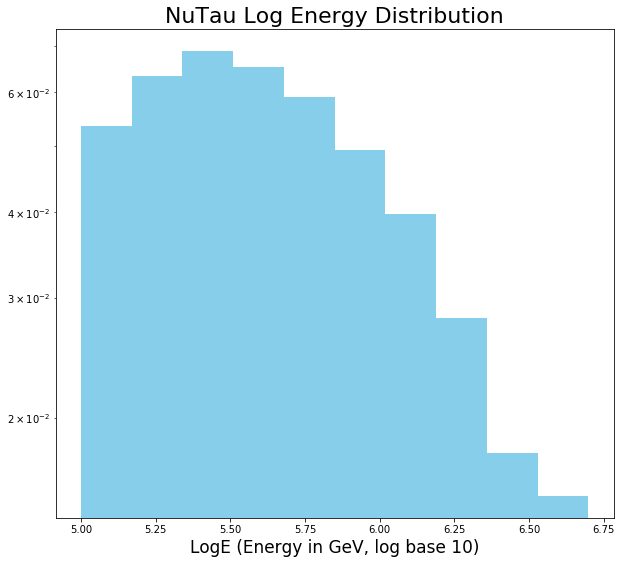

In [16]:
liveTime = 365*24*60*60
event_weight = sim_weight*liveTime/(2000*weightDict['NEvents'])
logE = np.log10(energy)
print(len(logE))

plt.figure(figsize=(10,9))
num, bins,_ = plt.hist(logE, log = True, weights=event_weight, color='skyblue')
#num1,bins1,_ = plt.hist(logE, histtype='step',log = True)
plt.title("NuTau Log Energy Distribution", fontsize=22)
plt.xlabel("LogE (Energy in GeV, log base 10)", fontsize=17)

In [17]:
sum(num)

0.46042646507729157

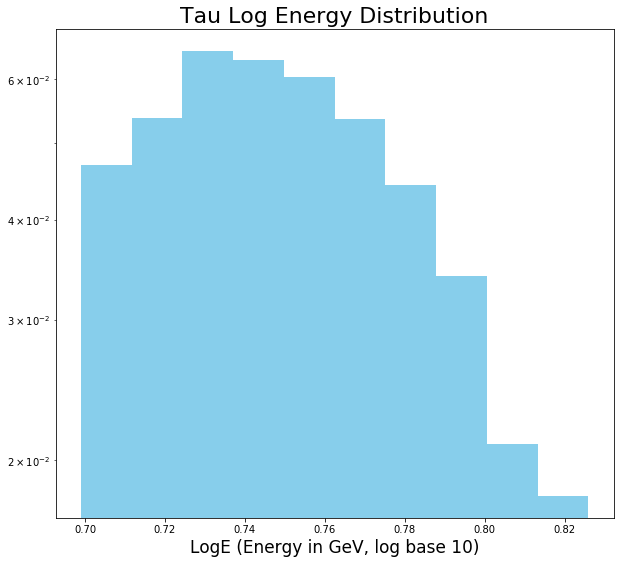

In [18]:
tau_logE = np.log10(logE)
plt.figure(figsize=(10,9))
num, bins,_ = plt.hist(tau_logE, log = True, weights=event_weight, color='skyblue')
#num1,bins1,_ = plt.hist(logE, histtype='step',log = True)
plt.title("Tau Log Energy Distribution", fontsize=22)
plt.xlabel("LogE (Energy in GeV, log base 10)", fontsize=17)